<a href="https://colab.research.google.com/github/15483114/atividade-python-2/blob/main/C2CFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global C2C Fashion Store User Behaviour Analysis**

O dataset escolhido é proveninete do kaggle e esá disponível neste endereço:
https://www.kaggle.com/datasets/thedevastator/global-c2c-fashion-store-user-behaviour-analysis

O dataset está disponível em 4 arquivos que mostram o comportamento de usuários ao redor do mundo. O dataset principal é de usuários e os outros 3 são estatísticas em cima do dataset de usuário, temos um dataset que divide os usuários por países, por vendedores e top vendedores, os dois últimos são pouco esclarecidos de contexto e portanto não serão utilizados. O dataset que será utilizado para testar modelos é o de usuário, porém o dataset de países parece promissor e será analisado também.



Monte um algoritmo preditivo de projeção OU de classificação, utilizando respetivamente Regressão Linear ou Regressão Logística. Para tal, selecione uma base de dados adequada no https://www.kaggle.com/datasets. Antes de realizar o treino do seu algoritmo realize uma análise exploratória, principalmente correlacionando as features e o label. Identificados estes, siga o processo de treinar, validar, testar e revalidar. Não esqueça de apresentar sua conclusões de negócio (utilize o botão +texto) 



Atividade 3 (a ser entregue no portal): Utilizando uma base de dados do Kaggle, realize uma Classificação com a Reg Logística ou Árvore de Decisão (caso na atividade anterior tenha já utilizado RegLog, utilize nesta Árvore). Não esqueça de separar treino e teste, bem como de calcular as devidas métricas. Em seguida, realize um processo de AutoML com H2O, e aí as métricas melhoraram?

Escolha uma base de dados no https://www.kaggle.com/datasets 

0) Se familiarize com sua base, não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

1) Realize sumarizacoes. Veja qual tipo de gráfico é útil para sua análise se barras, linha ou pizza

2) Faça análises estatísticas
Apresente o histograma
Calcule os quartis 
Apresente o boxplot 

Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# dataset de países
buyers = pd.read_csv('/content/drive/MyDrive/FIAP/python2 (1)/archive/Buyers-repartition-by-country.csv')
buyers

,index,country,buyers,topbuyers,topbuyerratio,femalebuyers,malebuyers,topfemalebuyers,topmalebuyers,femalebuyersratio,...,meanproductsliked,topmeanproductsbought,topmeanproductswished,topmeanproductsliked,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,0,France,1251,53,4.2,851,400,33,20,68.0,...,20.2,28.1,77.2,120.9,321.8,75.0,4.8,8.8,10.1,11.0
1,1,Royaume-Uni,792,38,4.8,560,232,30,8,70.7,...,29.5,22.4,161.2,193.7,298.3,68.2,5.4,8.8,11.1,12.2
2,2,Etats-Unis,912,31,3.4,700,212,21,10,76.8,...,32.8,27.9,119.4,224.1,359.3,73.0,4.9,9.7,11.7,27.9
3,3,Allemagne,578,29,5.0,409,169,21,8,70.8,...,41.1,17.8,175.7,367.2,296.6,39.3,5.1,8.6,11.2,11.3
4,4,Italie,400,21,5.3,283,117,14,7,70.8,...,35.5,24.7,208.4,103.4,247.9,40.9,6.4,11.6,14.3,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Malte,1,0,0.0,1,0,0,0,100.0,...,2.0,NaN,NaN,NaN,366.0,NaN,3.0,8.0,NaN,NaN
58,58,Géorgie,1,0,0.0,1,0,0,0,100.0,...,2.0,NaN,NaN,NaN,37.0,NaN,3.0,8.0,NaN,NaN
59,59,Pakistan,1,0,0.0,0,1,0,0,0.0,...,1.0,NaN,NaN,NaN,431.0,NaN,4.0,9.0,NaN,NaN
60,60,Mexique,1,0,0.0,1,0,0,0,100.0,...,98.0,NaN,NaN,NaN,61.0,NaN,9.0,13.0,NaN,NaN


In [ ]:
import pandas as pd
# dataset de usuários
users = pd.read_csv('/content/drive/MyDrive/FIAP/python2 (1)/archive/6M-0K-99K.users.dataset.public.csv')
users

,index,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,2,9006282053848196165,user,Suède,en,3,8,0,0,0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,4,2858299215060733023,user,France,en,3,8,0,0,0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,...,mr,False,False,False,True,708,3204,106.80,8.9,us
98909,98909,-5607668753771114442,user,France,fr,3,8,0,0,0,...,mr,True,False,True,True,695,3204,106.80,8.9,fr
98910,98910,350630276238833248,user,Belgique,en,3,8,0,0,0,...,mr,True,True,False,True,520,3204,106.80,8.9,be
98911,98911,2006580738726207028,user,Italie,it,3,8,0,0,0,...,mrs,False,False,False,True,267,3204,106.80,8.9,it


In [ ]:
buyers.describe()

,index,buyers,topbuyers,topbuyerratio,femalebuyers,malebuyers,topfemalebuyers,topmalebuyers,femalebuyersratio,topfemalebuyersratio,...,meanproductsliked,topmeanproductsbought,topmeanproductswished,topmeanproductsliked,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,33.000000,...,62.000000,33.000000,33.000000,33.000000,62.000000,33.000000,62.000000,62.000000,33.000000,33.000000
mean,30.500000,87.403226,4.758065,11.003226,63.677419,23.725806,3.548387,1.209677,77.258065,78.321212,...,64.793548,26.690909,174.345455,293.315152,211.259677,43.318182,7.145161,12.996774,14.478788,19.503030
std,18.041619,229.799161,10.166943,23.097938,163.356271,67.275838,7.146425,3.254944,22.457308,29.450517,...,116.711571,17.214082,200.314512,367.217416,134.349379,40.370499,8.195974,20.898011,11.463877,29.080196
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11.000000,0.000000,2.000000,11.000000,11.000000,3.000000,7.700000,4.000000,8.000000
25%,15.250000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.200000,66.700000,...,10.625000,18.000000,51.600000,106.000000,119.550000,14.000000,4.325000,8.225000,9.000000,9.000000
50%,30.500000,6.000000,1.000000,3.300000,5.000000,1.000000,0.000000,0.000000,77.800000,88.900000,...,35.750000,21.200000,119.400000,193.700000,222.550000,26.000000,5.550000,8.800000,11.200000,10.600000
75%,45.750000,30.500000,3.000000,9.850000,22.750000,8.750000,2.750000,1.000000,100.000000,100.000000,...,67.175000,27.900000,208.400000,388.800000,294.725000,68.200000,6.500000,9.500000,16.300000,12.200000
max,61.000000,1251.000000,53.000000,100.000000,851.000000,400.000000,33.000000,20.000000,100.000000,100.000000,...,792.000000,87.000000,803.000000,2021.000000,692.000000,189.000000,65.000000,157.000000,65.000000,157.000000


In [ ]:
buyers.info()

In [ ]:
buyers[buyers['country'] == 'Brésil']

In [ ]:
buyers.head(15)

# **Analisando compradores por país**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# #ordenando do maior para o menor pela variável boughtperwishlistratio
# buyers.sort_values(by='boughtperwishlistratio', ascending=False)
# for i in range(0,10,1):
#   fig = sns.barplot(x = 'country', y = 'boughtperwishlistratio', data = buyers.iloc[i:i+10,:])
#   plt.title("Produtos da lista de desejos que foram comprados")
#   fig.figure.set_size_inches(15, 15)
#   plt.show()

  # if(i == 60):
  #   sns.barplot(x = 'buyers', y = 'boughtperwishlistratio', data = buyers.iloc[60:61,:])
  #   plt.title("Produtos da lista de desejos que foram comprados")
  # plt.show()
# sns.barplot(x = 'buyers', y = 'boughtperwishlistratio', data = buyers.head(15))
# plt.title("Produtos da lista de desejos que foram comprados")
# plt.show()

In [ ]:
buyers.sort_values(by='boughtperwishlistratio', ascending=False)

,index,country,buyers,topbuyers,topbuyerratio,femalebuyers,malebuyers,topfemalebuyers,topmalebuyers,femalebuyersratio,...,meanproductsliked,topmeanproductsbought,topmeanproductswished,topmeanproductsliked,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
55,55,Bahreïn,1,0,0.0,1,0,0,0,100.0,...,2.0,NaN,NaN,NaN,21.0,NaN,4.0,8.0,NaN,NaN
56,56,Nouvelle Zélande,1,0,0.0,1,0,0,0,100.0,...,49.0,NaN,NaN,NaN,33.0,NaN,6.0,8.0,NaN,NaN
19,19,Chine,13,2,15.4,9,4,2,0,69.2,...,45.5,45.5,3.5,220.0,315.9,189.0,4.7,8.5,6.0,10.0
38,38,Russie,5,0,0.0,4,1,0,0,80.0,...,6.2,NaN,NaN,NaN,285.2,NaN,4.4,8.2,NaN,NaN
47,47,Arabie Saoudite,2,0,0.0,2,0,0,0,100.0,...,12.5,NaN,NaN,NaN,32.0,NaN,4.5,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,49,Indonésie,2,0,0.0,1,1,0,0,50.0,...,11.0,NaN,NaN,NaN,331.5,NaN,5.0,9.5,NaN,NaN
52,52,Slovaquie,2,0,0.0,2,0,0,0,100.0,...,0.0,NaN,NaN,NaN,459.0,NaN,6.5,9.0,NaN,NaN
57,57,Malte,1,0,0.0,1,0,0,0,100.0,...,2.0,NaN,NaN,NaN,366.0,NaN,3.0,8.0,NaN,NaN
58,58,Géorgie,1,0,0.0,1,0,0,0,100.0,...,2.0,NaN,NaN,NaN,37.0,NaN,3.0,8.0,NaN,NaN


In [ ]:
users.describe()

,index,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,98913.000000,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,49456.000000,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,655.732310,3063.771870,102.125583,8.510424
std,28553.867925,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,7407.430369,168.298621,5.609735,0.467863
min,0.000000,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,24728.000000,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,49456.000000,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,74184.000000,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,98912.000000,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,737028.000000,3205.000000,106.830000,8.900000


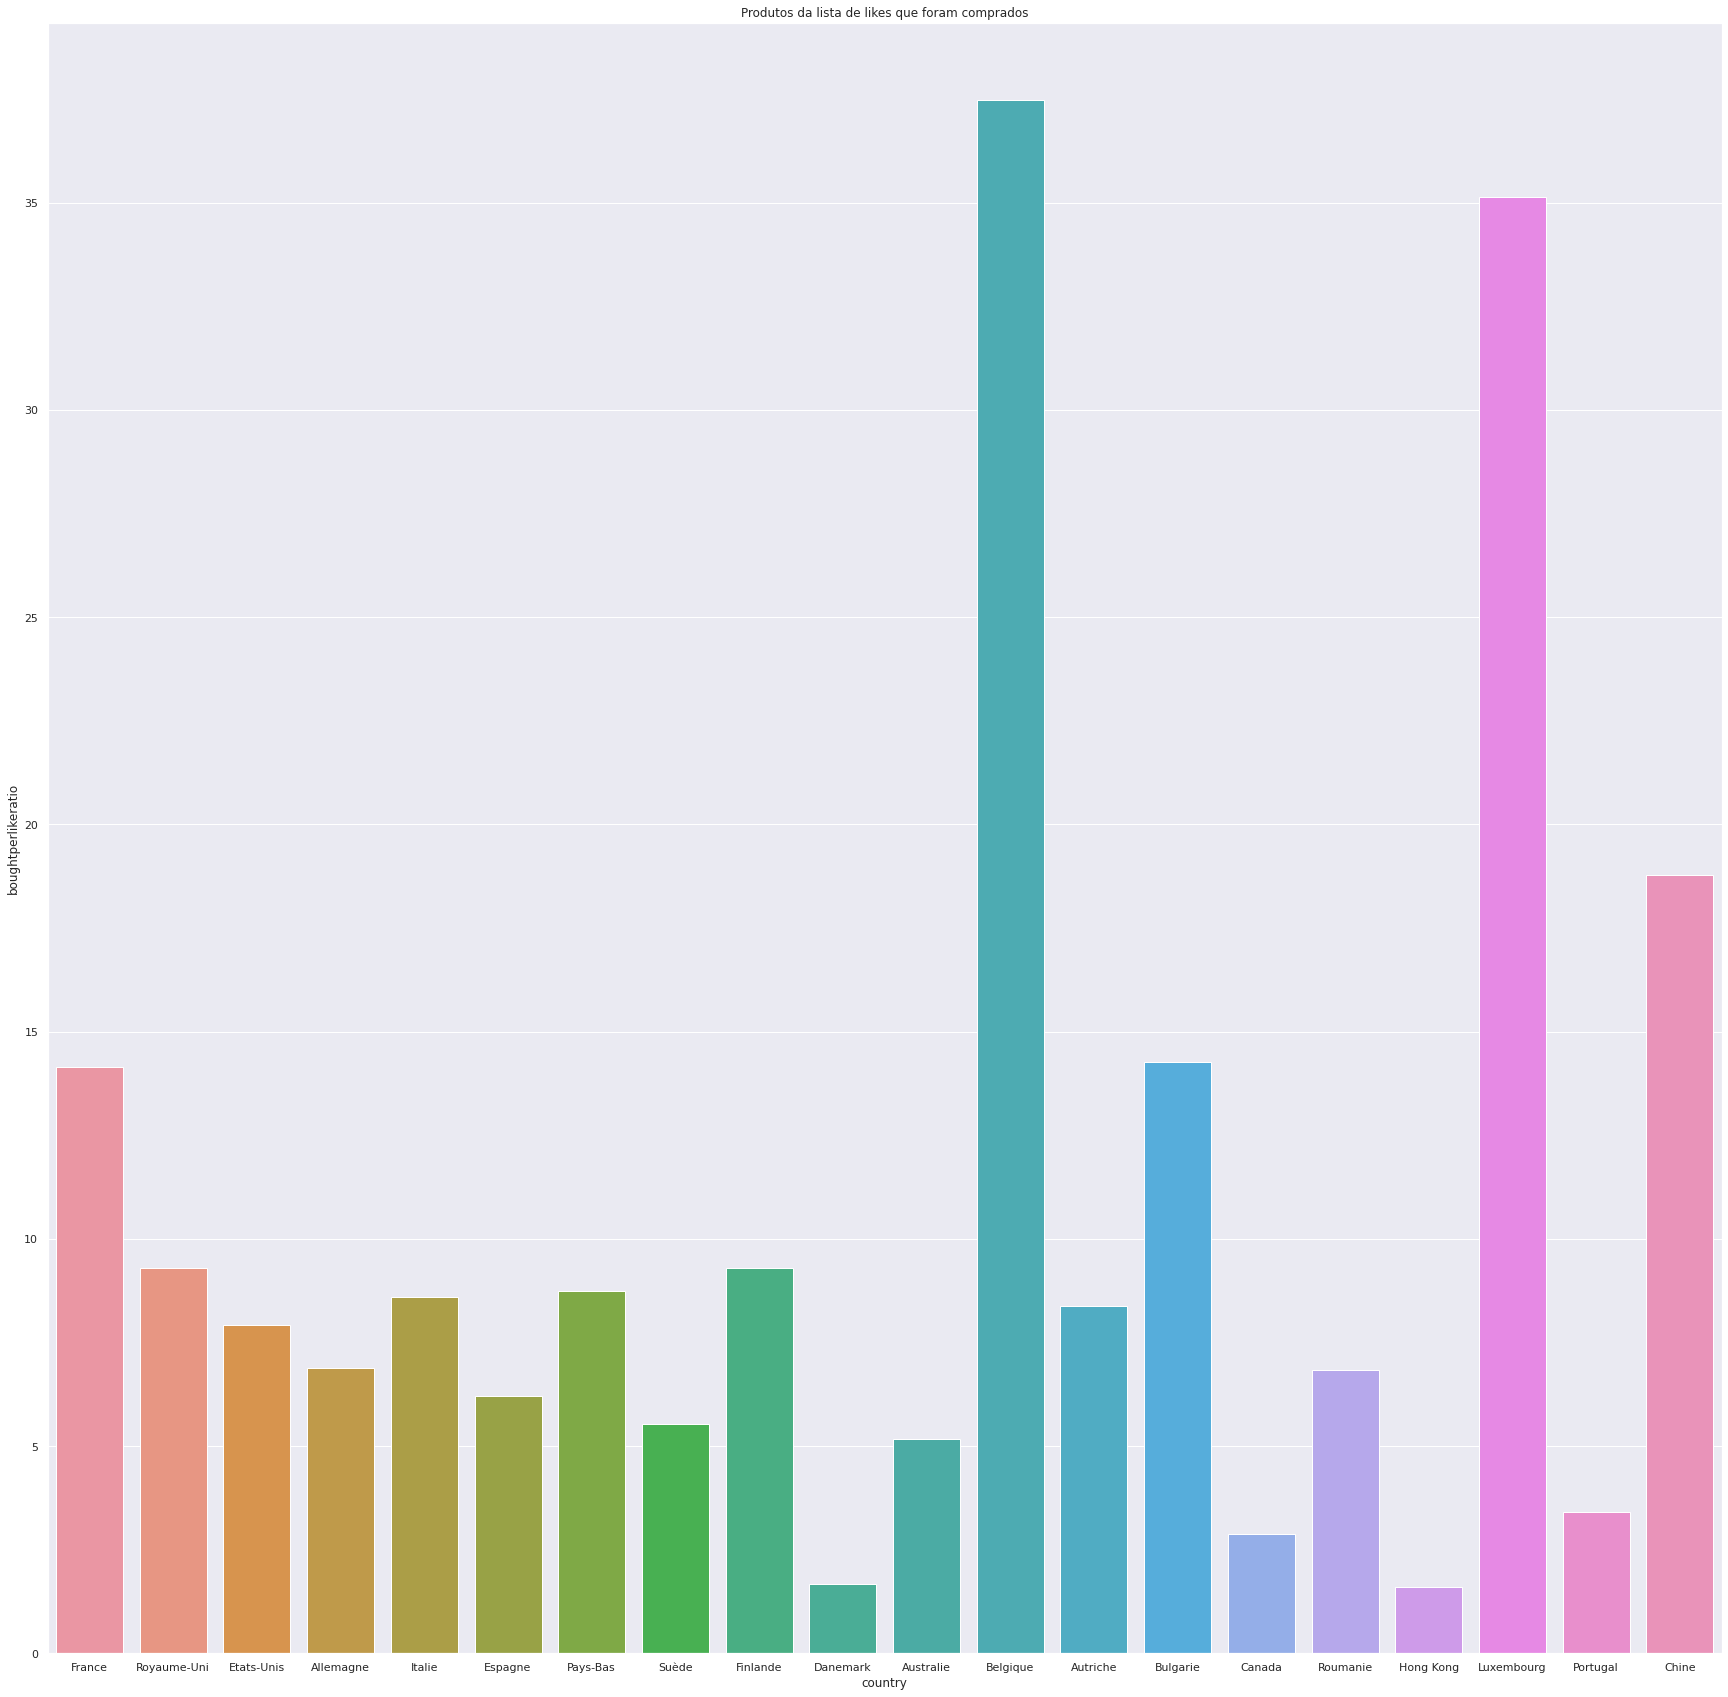

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.barplot(x = 'country', y = 'boughtperlikeratio', data = buyers.head(20))
plt.title("Produtos da lista de likes que foram comprados")
fig.figure.set_size_inches(30, 30)
plt.show()

In [ ]:
buyers.isnull().mean().round(4)*100

index                         0.00
country                       0.00
buyers                        0.00
topbuyers                     0.00
topbuyerratio                 0.00
femalebuyers                  0.00
malebuyers                    0.00
topfemalebuyers               0.00
topmalebuyers                 0.00
femalebuyersratio             0.00
topfemalebuyersratio         46.77
boughtperwishlistratio        8.06
boughtperlikeratio            3.23
topboughtperwishlistratio    48.39
topboughtperlikeratio        46.77
totalproductsbought           0.00
totalproductswished           0.00
totalproductsliked            0.00
toptotalproductsbought        0.00
toptotalproductswished        0.00
toptotalproductsliked         0.00
meanproductsbought            0.00
meanproductswished            0.00
meanproductsliked             0.00
topmeanproductsbought        46.77
topmeanproductswished        46.77
topmeanproductsliked         46.77
meanofflinedays               0.00
topmeanofflinedays  

Analisando taxas de conversão por países

Os países serão separados por faixas de quantidades de produtos vendidos para analisar as seguintes variáveis:

- boughtperwishlistratio	Ratio of products bought to products wished for in the country. (Float)
- boughtperlikeratio	Ratio of products bought to products liked in the country. (Float)

Categorias:

1000> : 
500>:
100>: 
10>:
1>:
0

In [ ]:
buyers['totalproductsbought']

0     3573
1     2174
2     2370
3     1635
4     1221
      ... 
57       1
58       3
59       1
60       4
61       1
Name: totalproductsbought, Length: 62, dtype: int64

In [ ]:
buyers['categorias'] = pd.cut(buyers['totalproductsbought'], bins=[0,1,10,100,500,1000, 3574], labels=['1','1-10','10-100','100-500','500-1000','+1000'])


In [ ]:
buyers['categorias']

0     +1000
1     +1000
2     +1000
3     +1000
4     +1000
      ...  
57        1
58     1-10
59        1
60     1-10
61        1
Name: categorias, Length: 62, dtype: category
Categories (6, object): ['1' < '1-10' < '10-100' < '100-500' < '500-1000' < '+1000']

In [ ]:
buyers.groupby('categorias').count()['boughtperwishlistratio']

categorias
0       3
1      19
10     15
100    11
500     3
Name: boughtperwishlistratio, dtype: int64

In [ ]:
coisa = buyers[['country','categorias']]
coisa

,country,categorias
0,France,1000
1,Royaume-Uni,1000
2,Etats-Unis,1000
3,Allemagne,1000
4,Italie,1000
...,...,...
57,Malte,0
58,Géorgie,1
59,Pakistan,0
60,Mexique,1


In [ ]:
# adm = notas[ notas['Curso']=='ADM'] 
med_adm = coisa.groupby('categorias').count()
med_adm.plot(kind='bar')

In [ ]:
med_adm

categorias
0       5
1      22
10     15
100    11
500     3
Name: country, dtype: int64

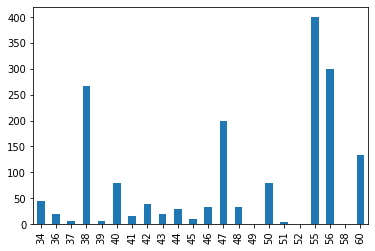

In [ ]:
buyers[buyers['categorias'] == '1']['boughtperwishlistratio'].plot(kind='bar')

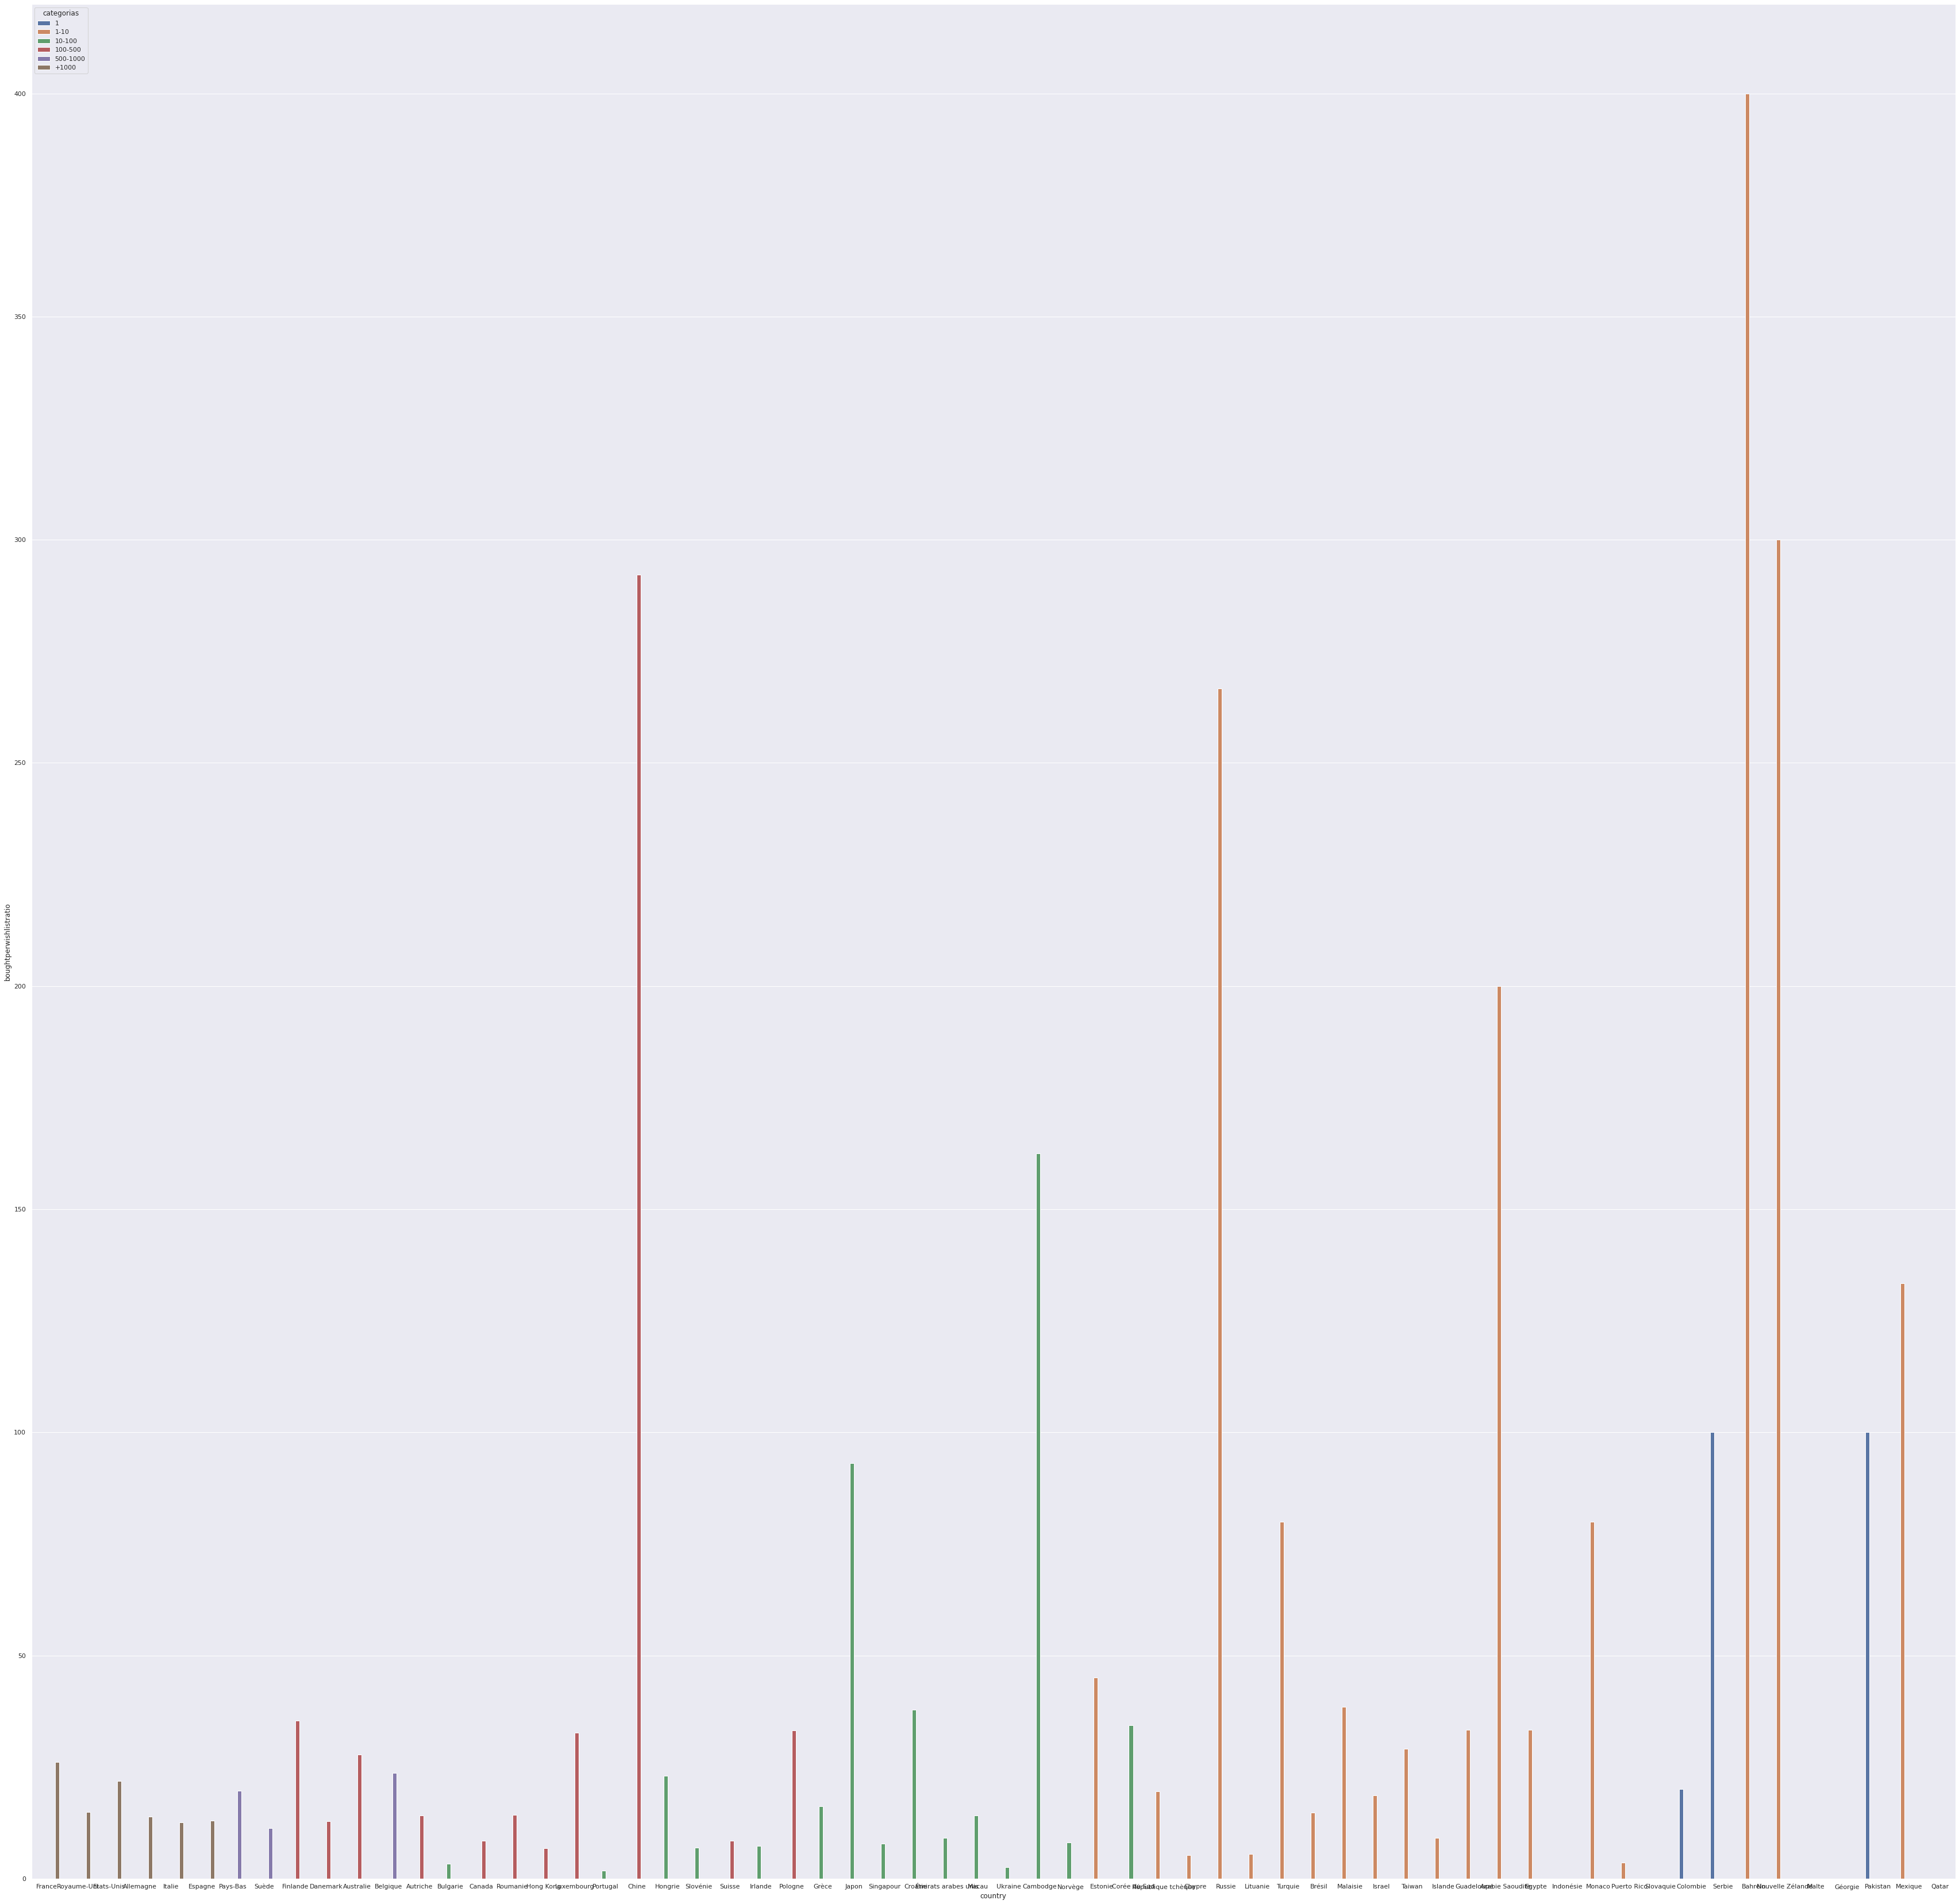

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(60, 60))

# grouped barplot
sns.barplot(x="country", y="boughtperwishlistratio", hue='categorias', data=buyers, ci=None);

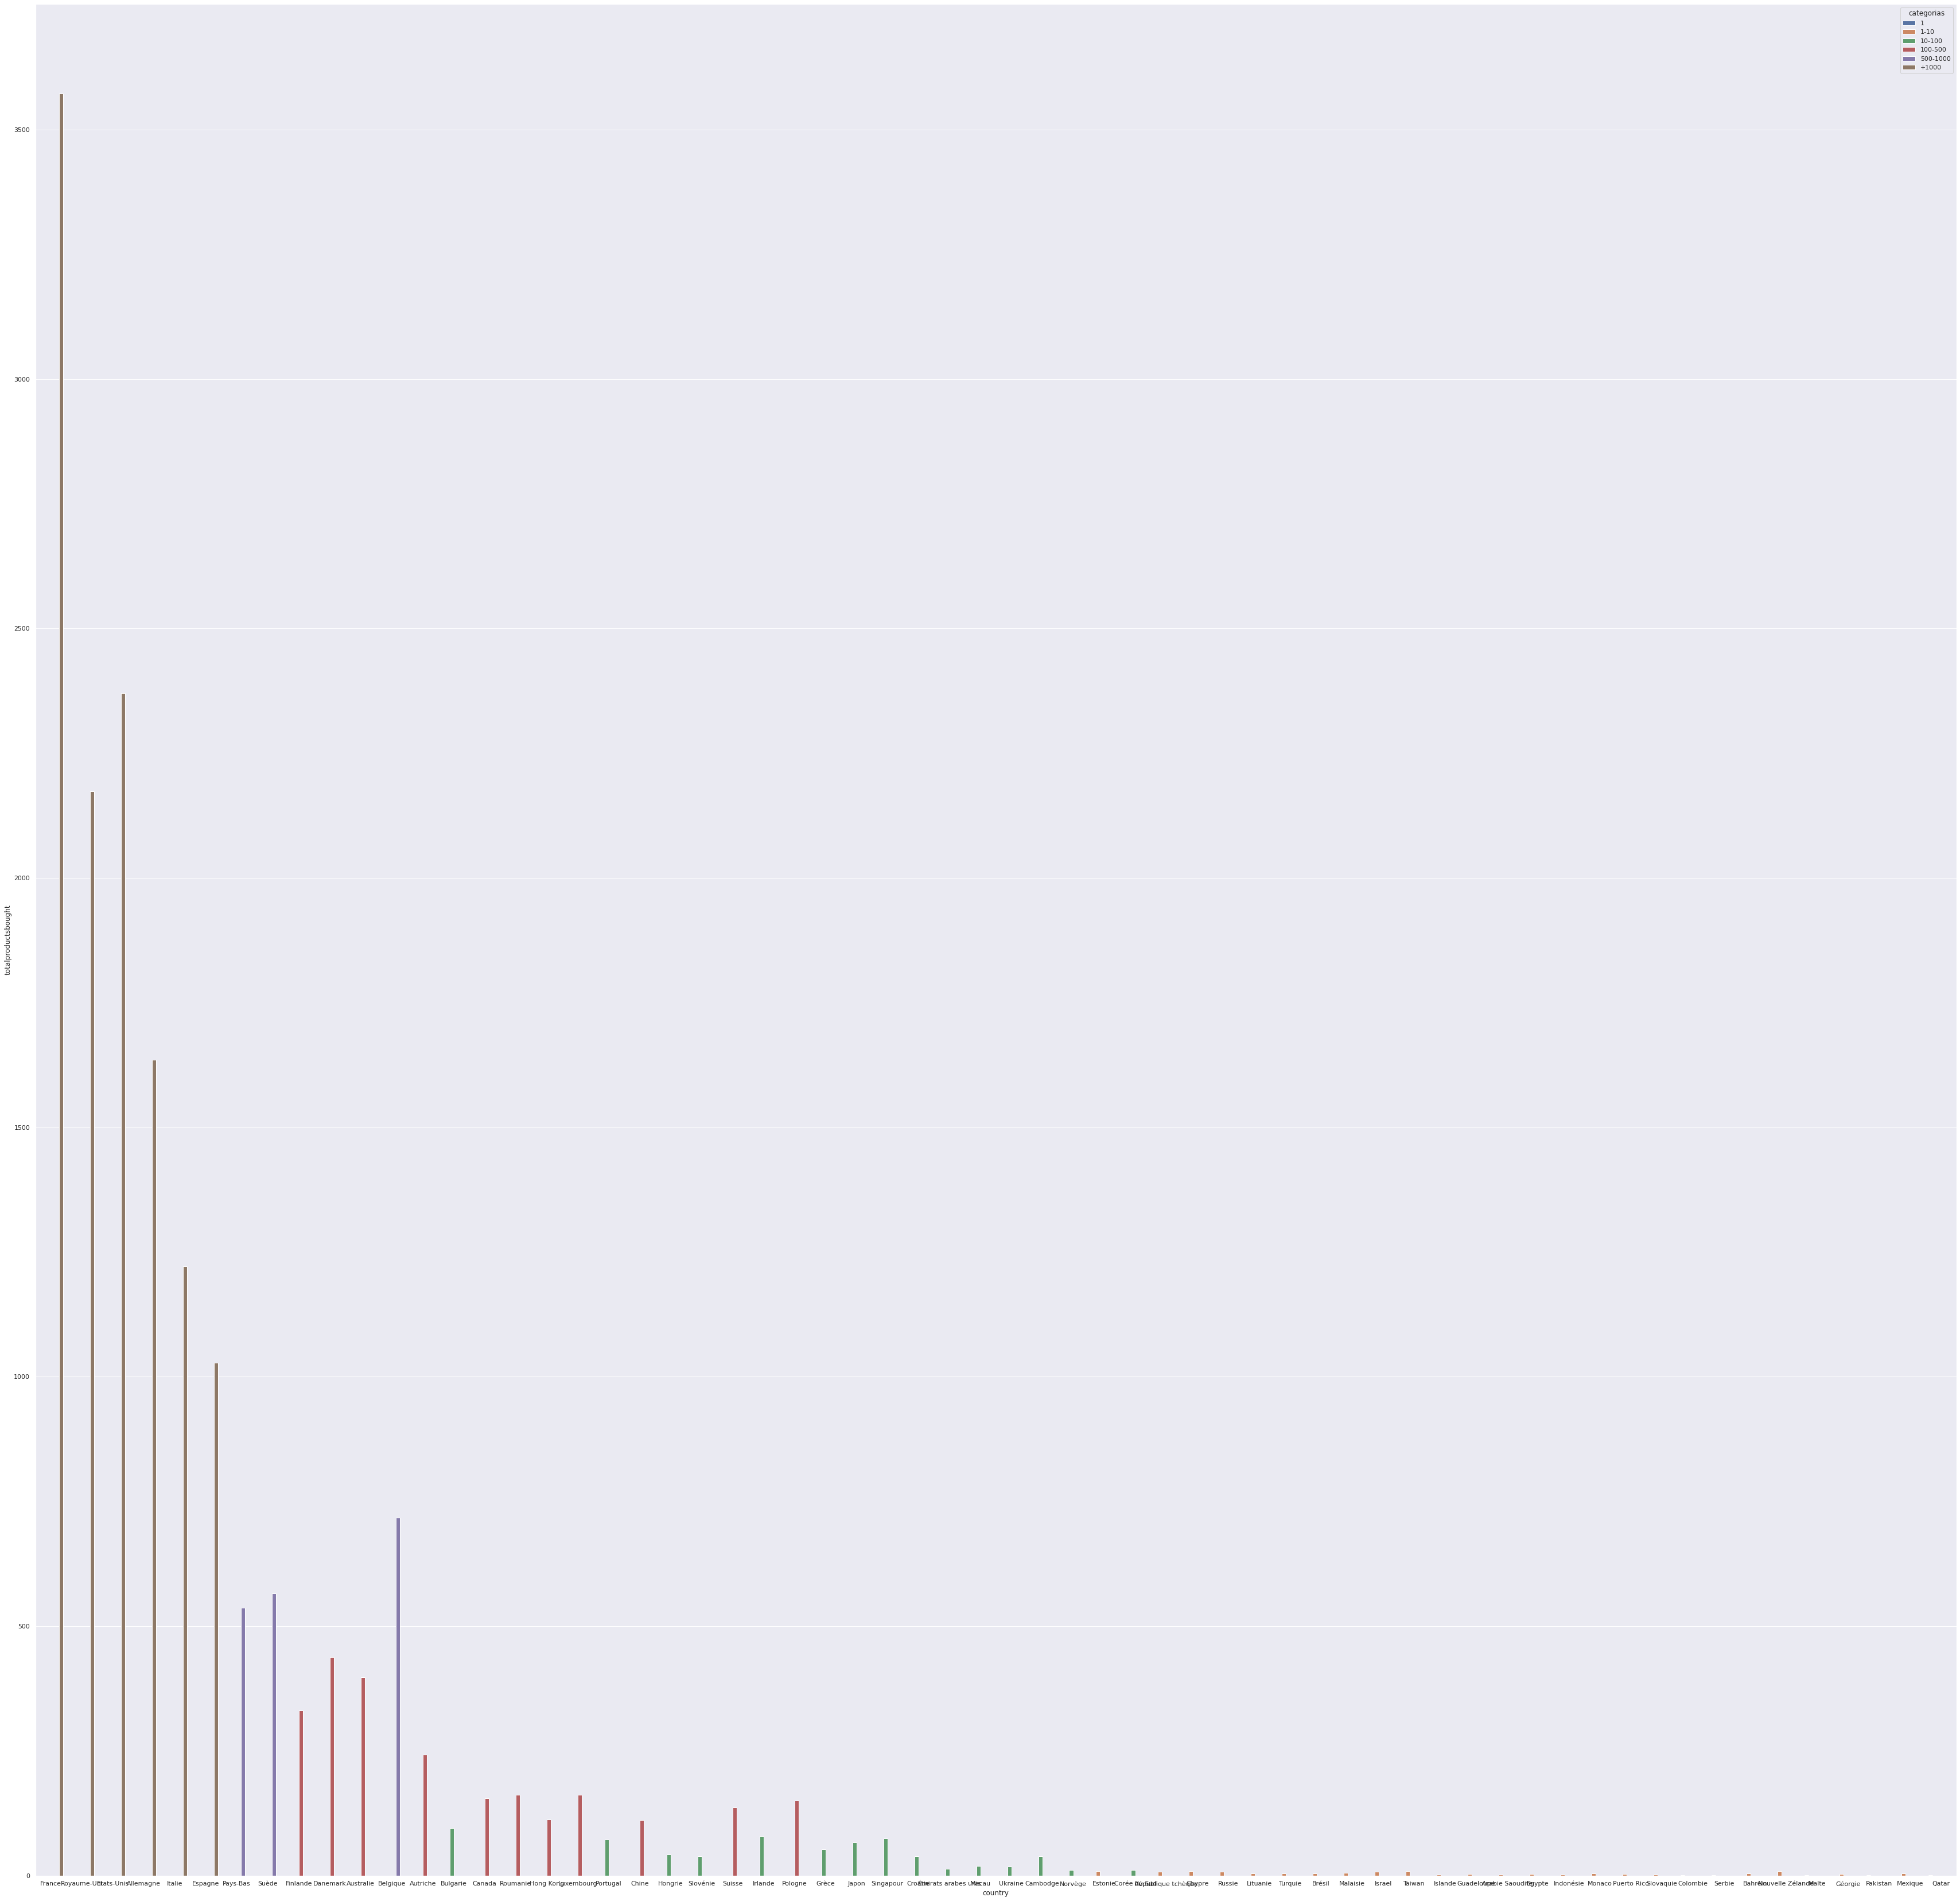

In [ ]:
# Set the figure size
plt.figure(figsize=(60, 60))

# grouped barplot
sns.barplot(x="country", y="totalproductsbought", hue='categorias', data=buyers, ci=None);

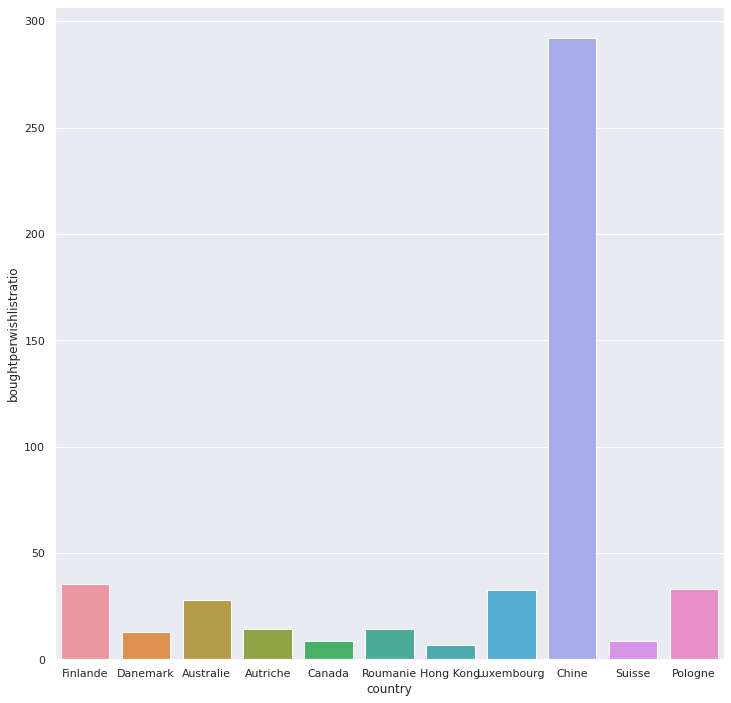

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(12, 12))

# grouped barplot
sns.barplot(x="country", y="boughtperwishlistratio", data=buyers[buyers['categorias'] == '100'], ci=None);

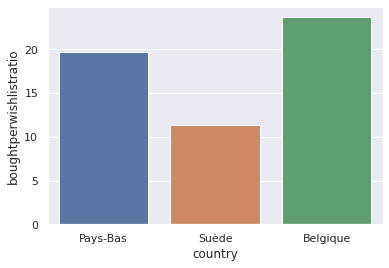

In [ ]:
sns.barplot(x="country", y="boughtperwishlistratio", data=buyers[buyers['categorias'] == '500'], ci=None);

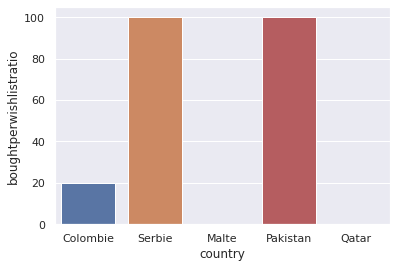

In [ ]:
sns.barplot(x="country", y="boughtperwishlistratio", data=buyers[buyers['categorias'] == '1'], ci=None);

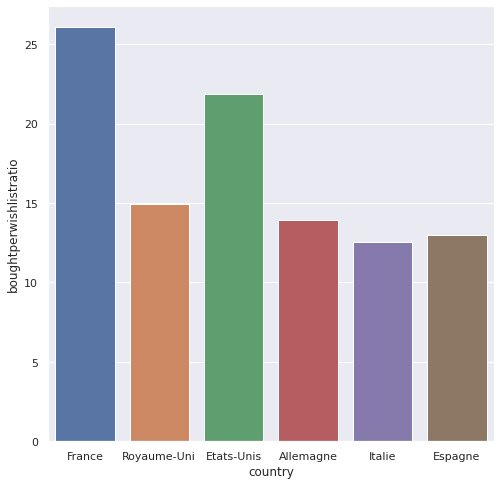

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x="country", y="boughtperwishlistratio", data=buyers[buyers['categorias'] == '+1000'], ci=None);

In [ ]:
buyers[buyers['categorias'] == '1']['totalproductsbought']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.xticks(med_adm, buyers['country'])

In [ ]:
buyers.iloc[57, :]

index                           57
country                      Malte
buyers                           1
topbuyers                        0
topbuyerratio                  0.0
femalebuyers                     1
malebuyers                       0
topfemalebuyers                  0
topmalebuyers                    0
femalebuyersratio            100.0
topfemalebuyersratio           NaN
boughtperwishlistratio         NaN
boughtperlikeratio            50.0
topboughtperwishlistratio      NaN
topboughtperlikeratio          NaN
totalproductsbought              1
totalproductswished              0
totalproductsliked               2
toptotalproductsbought           0
toptotalproductswished           0
toptotalproductsliked            0
meanproductsbought             1.0
meanproductswished             0.0
meanproductsliked              2.0
topmeanproductsbought          NaN
topmeanproductswished          NaN
topmeanproductsliked           NaN
meanofflinedays              366.0
topmeanofflinedays  

# **Analisando perfis de consumidores**

O Global C2C disponibiliza um dataset com usuários ao redor do mundo, e um estudo interessante seria entender o comportamento dos compradores que compram algum produto

In [ ]:
users.groupby('productsBought').count()

# **Visualizando a taxa de conversão**

A taxa de conversão em vendas é uma métrica que indica a porcentagem de pessoas que completaram uma determinada ação desejada, neste estudo clientes que realizaram alguma compra.

In [ ]:
users_that_bought_something = len(users[users['productsBought'] > 0])
users_that_didnt_buy_anything = len(users[users['productsBought'] == 0])

print("taxa de conversão: {} %".format((users_that_bought_something/(users_that_bought_something+users_that_didnt_buy_anything)*100)))

taxa de conversão: 5.4785518587041135 %


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


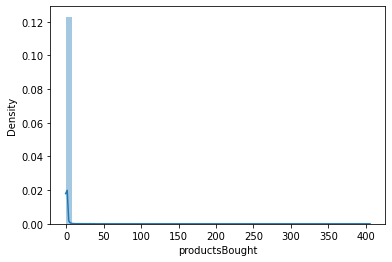

In [ ]:
import seaborn as sns
sns.distplot(users['productsBought'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='productsBought'>

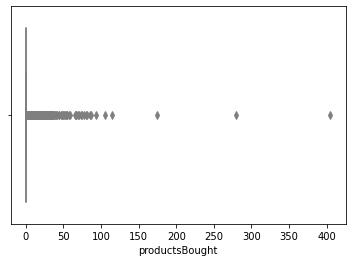

In [ ]:
import seaborn as sns
sns.boxplot(users['productsBought'], palette="Pastel1")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='productsBought'>

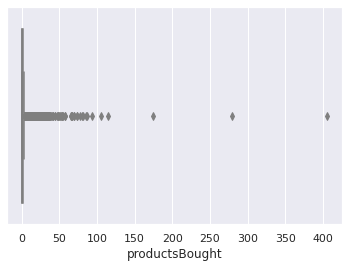

In [ ]:
sns.boxplot(users[users['productsBought'] > 0]['productsBought'], palette="Pastel1")

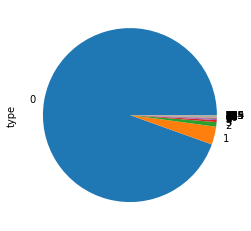

In [ ]:
buyers = users.groupby('productsBought').count()['type']
buyers.plot(kind='pie')

Como podemos observar a quantidade de usuários que não fizeram nenhuma compra é muito maior do que os usuários que fizeram alguma compra, então é interessante analisar esses usuários separadamente. 

In [ ]:
# separando as notas por intervalos e conceitos

users['categorias'] = pd.cut(users['productsBought'], bins=[0,1,2,3,4,5,6,9,10,20,40], labels=['1','2','3','4','5','6','7','10','20','40'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


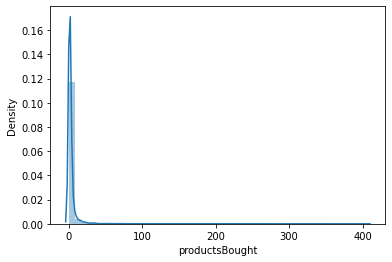

In [ ]:
import seaborn as sns
sns.distplot(users[users['productsBought'] > 0]['productsBought'])

In [ ]:
users.groupby('categorias').count()

,index,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
categorias,,,,,,,,,,,,,,,,,,,,,
1,3297,3297,3297,3297,3297,3297,3297,3297,3297,3297,...,3297,3297,3297,3297,3297,3297,3297,3297,3297,3297
2,845,845,845,845,845,845,845,845,845,845,...,845,845,845,845,845,845,845,845,845,845
3,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
4,214,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
5,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
6,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
7,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
10,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
20,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


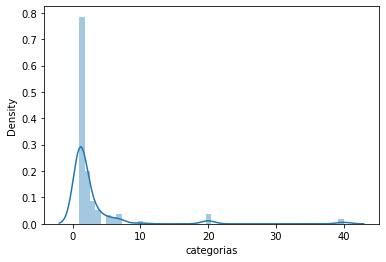

In [ ]:
import seaborn as sns
sns.distplot(users['categorias'])

In [ ]:
users['productsBought']

0        0
1        0
2        0
3        0
4        0
        ..
98908    0
98909    0
98910    0
98911    0
98912    0
Name: productsBought, Length: 98913, dtype: int64

# Visualizando a taxa de conversão de países com mais vendas e boa taxa de produtos comprados/ likes

In [ ]:
frenchs = users[users['country'] == 'France']
french_users_that_bought_something = len(frenchs[frenchs['productsBought'] > 0])
french_users_that_didnt_buy_anything = len(frenchs[frenchs['productsBought'] == 0])
print("taxa de conversão francesa: {} %".format((french_users_that_bought_something/(french_users_that_bought_something+french_users_that_didnt_buy_anything)*100)))

taxa de conversão francesa: 4.97712353292222 %


In [ ]:
chinese = users[users['country'] == 'Chine']
chinese_users_that_bought_something = len(chinese[chinese['productsBought'] > 0])
chinese_users_that_didnt_buy_anything = len(chinese[chinese['productsBought'] == 0])
print("taxa de conversão chinesa: {} %".format((chinese_users_that_bought_something/(chinese_users_that_bought_something+chinese_users_that_didnt_buy_anything)*100)))

taxa de conversão chinesa: 3.0373831775700935 %


In [ ]:
chinese

,index,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
135,135,-5096141708998208738,user,Chine,en,3,8,3,0,0,...,mrs,True,False,True,True,700,3205,106.83,8.9,cn
212,212,-5019591860696866147,user,Chine,en,3,8,0,0,0,...,mrs,True,False,True,True,429,3205,106.83,8.9,cn
285,285,2000735234778143663,user,Chine,en,3,8,0,0,0,...,mrs,True,False,True,True,467,3205,106.83,8.9,cn
565,565,2375548637536689372,user,Chine,en,3,8,0,0,0,...,mrs,False,False,False,True,195,3205,106.83,8.9,cn
791,791,-6158736243928639054,user,Chine,en,3,8,0,0,0,...,mrs,True,False,True,True,709,3205,106.83,8.9,cn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96972,96972,-6847565337499162262,user,Chine,en,3,8,0,0,0,...,mrs,False,False,False,True,708,3204,106.80,8.9,cn
97666,97666,-5682670462817861230,user,Chine,en,3,8,0,0,0,...,mrs,True,False,True,True,708,3204,106.80,8.9,cn
97923,97923,-2197843685845240927,user,Chine,en,3,8,1,0,0,...,mrs,False,False,False,True,708,3204,106.80,8.9,cn
98479,98479,1990867031582547682,user,Chine,en,3,8,0,0,0,...,mrs,True,False,True,True,694,3204,106.80,8.9,cn


# Tratamento de dados

Selecionando colunas interessantes e tratando dados categóricos

In [ ]:
users_1 = users
# coluna redundante, equivalente ao countryCode
users_1 = users_1.drop(['country'], axis=1)
# coluna que eu considero irrelevante, a língua é parte da cultura de um país, logo saber de onde o usuário vem é uma informação mais relevante que engloba a lígua
users_1 = users_1.drop(['language'], axis=1)
users_1 = users_1.drop(['identifierHash'], axis=1)
users_1 = users_1.drop(['index'], axis=1)
# todos os valores dessa coluna são iguais
users_1 = users_1.drop(['type'], axis=1)
users_1 = users_1.drop(['civilityTitle'], axis=1)
# variáveis redundante por dizer a mesma coisa que seniority
users_1 = users_1.drop(['seniorityAsYears'], axis=1)
users_1 = users_1.drop(['seniorityAsMonths'], axis=1)
# informação redundante por civilityGenderId
users_1 = users_1.drop(['gender'], axis=1)
# por ser muito custoso aplicar o one hot encoder nessa coluna ela será removida
users_1 = users_1.drop(['countryCode'], axis=1)

In [ ]:
users_1['civilityGenderId']

In [ ]:
users_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   socialNbFollowers    98913 non-null  int64  
 1   socialNbFollows      98913 non-null  int64  
 2   socialProductsLiked  98913 non-null  int64  
 3   productsListed       98913 non-null  int64  
 4   productsSold         98913 non-null  int64  
 5   productsPassRate     98913 non-null  float64
 6   productsWished       98913 non-null  int64  
 7   civilityGenderId     98913 non-null  int64  
 8   hasAnyApp            98913 non-null  bool   
 9   hasAndroidApp        98913 non-null  bool   
 10  hasIosApp            98913 non-null  bool   
 11  hasProfilePicture    98913 non-null  bool   
 12  daysSinceLastLogin   98913 non-null  int64  
 13  seniority            98913 non-null  int64  
 14  classe               98913 non-null  int64  
dtypes: bool(4), float64(1), int64(10)
me

In [ ]:
# Vendo a matriz de correlação das variáveis para usuários que fizeram alguma compra
import plotly.express as px
fig = px.imshow(users_1[users_1['productsBought'] > 0].corr())
fig.show()

In [ ]:
# Verificando dados faltantes
users_1.isnull().mean().round(4)*100

socialNbFollowers      0.0
socialNbFollows        0.0
socialProductsLiked    0.0
productsListed         0.0
productsSold           0.0
productsPassRate       0.0
productsWished         0.0
productsBought         0.0
civilityGenderId       0.0
hasAnyApp              0.0
hasAndroidApp          0.0
hasIosApp              0.0
hasProfilePicture      0.0
daysSinceLastLogin     0.0
seniority              0.0
dtype: float64

# **Prevendo se clientes vão realizar alguma compra ou não**



Para prever se os usuários vão fazer uma compra ou não será criada uma variável para servir de classe.
(0 se sim e 1 caso não)

In [ ]:
users_1 = users
# coluna redundante, equivalente ao countryCode
users_1 = users_1.drop(['country'], axis=1)
# coluna que eu considero irrelevante, a língua é parte da cultura de um país, logo saber de onde o usuário vem é uma informação mais relevante que engloba a lígua
users_1 = users_1.drop(['language'], axis=1)
users_1 = users_1.drop(['identifierHash'], axis=1)
users_1 = users_1.drop(['index'], axis=1)
# todos os valores dessa coluna são iguais
users_1 = users_1.drop(['type'], axis=1)
users_1 = users_1.drop(['civilityTitle'], axis=1)
# variáveis redundante por dizer a mesma coisa que seniority
users_1 = users_1.drop(['seniorityAsYears'], axis=1)
users_1 = users_1.drop(['seniorityAsMonths'], axis=1)
# informação redundante por civilityGenderId
users_1 = users_1.drop(['gender'], axis=1)
# por ser muito custoso aplicar o one hot encoder nessa coluna ela será removida
users_1 = users_1.drop(['countryCode'], axis=1)
# pela matriz de correlação não tem muita correlação
users_1 = users_1.drop(['seniority'], axis=1)

In [ ]:
array=[]
# criando uma coluna de classe que indica se usuário fez alguma compra ou não
for x in users['productsBought']:
  variable = 0 if x>0 else 1
  array.append(variable)

users_1['classe'] = array

In [ ]:
from sklearn.model_selection import train_test_split

# spliting data 

X_treino, X_teste, y_treino, y_teste = train_test_split(users_1[['socialNbFollowers','socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished', 'civilityGenderId', 'hasAnyApp','hasProfilePicture', 'daysSinceLastLogin']], users_1['classe'], test_size=0.2)

# **Regressão Logística**

In [ ]:
import sklearn.linear_model as lm

rlog = lm.LogisticRegression()
rlog.fit(X_treino,y_treino)
acc_treino = rlog.score(X_treino, y_treino)
acc_treino*100

94.8970049285985

In [ ]:
prev_teste = rlog.predict(X_teste)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_teste, prev_teste)*100

94.8288934944144

array([[  130,   976],
       [   47, 18630]])

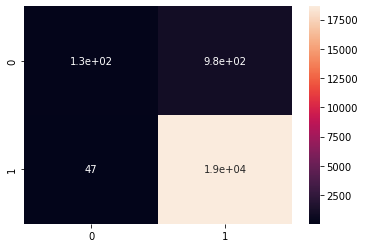

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
cm = confusion_matrix(y_teste, prev_teste)
sns.heatmap(cm,annot=True)
cm

Apesar da quantidade de classes estar desbalanceada a acurácia do modelo ficou bastante boa, creio que separar em classes foi uma decisão melhor do que utilizar a quantidade de produtos vendidos para regressão.

# **Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arv = DecisionTreeClassifier(max_depth = 3)

In [ ]:
arv.fit(X_treino,y_treino)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#acuracia
acuracia_de_treino = arv.score(X_treino,y_treino)
acuracia_de_treino*100

95.05750031593581

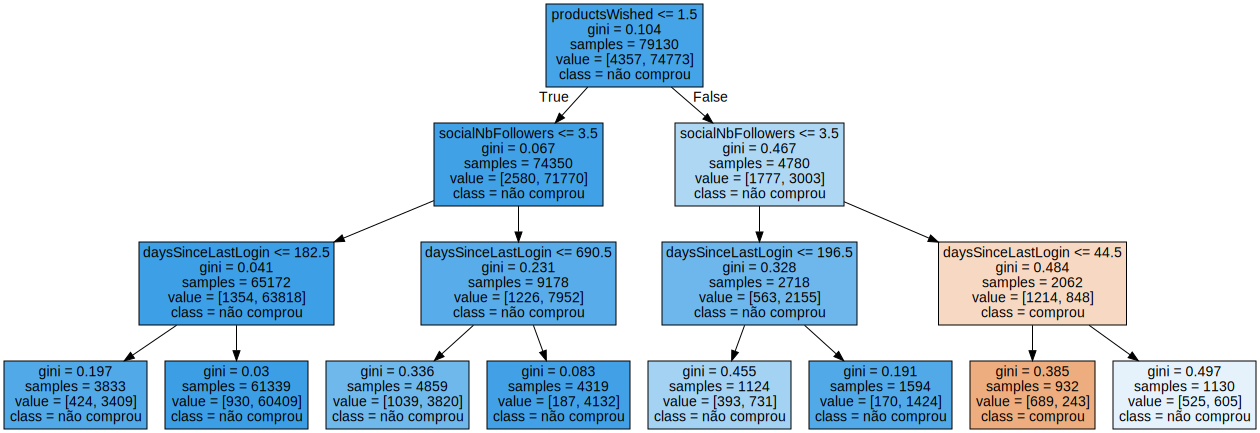

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv, filled=True, feature_names = ['socialNbFollowers','socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
        'civilityGenderId', 'hasAnyApp','hasProfilePicture', 'daysSinceLastLogin'], class_names=['comprou','não comprou'])
Source(dot_data)

Aqui iremos aplicar a árvore de regressão para poder comparar com o autoML posteriormente

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arv = DecisionTreeRegressor(max_depth = 3)

In [ ]:
from sklearn.model_selection import train_test_split

# spliting data 

X_treino, X_teste, y_treino, y_teste = train_test_split(users_1[['socialNbFollowers','socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished', 'civilityGenderId', 'hasAnyApp','hasProfilePicture', 'daysSinceLastLogin']], users_1['productsBought'], test_size=0.2)

In [ ]:
arv.fit(X_treino,y_treino)

DecisionTreeRegressor(max_depth=3)

Notamos que o modelo possui uma boa acurácia, apesar de ter muito mais casos de clientes que não compraram a árvore consegue apontar clientes que compraram.

In [ ]:
#acuracia
acuracia_de_treino = arv.score(X_treino,y_treino)
acuracia_de_treino*100

53.675614466117075

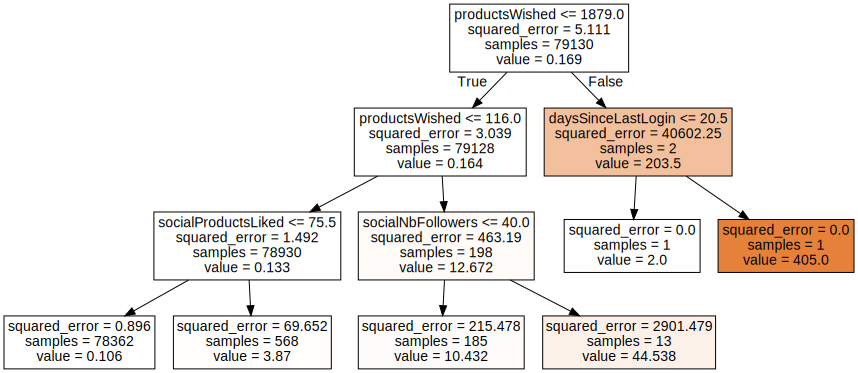

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv, filled=True, feature_names = ['socialNbFollowers','socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
        'civilityGenderId', 'hasAnyApp','hasProfilePicture', 'daysSinceLastLogin'])
Source(dot_data)

Em comparação com a acurácia da árvore de classificação notmaos uma redução significativa, muito provavelmente pela quantidade desproporcional de quantidades de itens comprados.

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5_he1cjk
  JVM stdout: /tmp/tmp5_he1cjk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5_he1cjk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_jrzc9u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML
dados = h2o.import_file('/content/drive/MyDrive/FIAP/python2 (1)/archive/6M-0K-99K.users.dataset.public.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dados['productsBought'] = dados['productsBought'].asfactor()
# 80% para treino

aml = H2OAutoML(max_models = 6, nfolds=5)
params = {'max_depth':[2,3,4]}
aml.train(['socialNbFollowers','socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
        'civilityGenderId', 'hasAnyApp','hasProfilePicture', 'daysSinceLastLogin'],'productsBought', dados)
arv = H2ORandomForestEstimator(nfolds = 5)
print(aml.leaderboard.head(10))
aml.get_best_model().model_performance()

AutoML progress: |███████████████████████████████████████████████████████████████